In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("covid19.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [34]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '2/28/2023', '3/1/2023', '3/2/2023', '3/3/2023', '3/4/2023', '3/5/2023',
       '3/6/2023', '3/7/2023', '3/8/2023', '3/9/2023'],
      dtype='object', length=1147)

In [35]:
# columns to keep
columns_to_keep = ["Country/Region"]+ list(df.columns)[4:]

In [36]:
w_df = df[columns_to_keep]
w_df.head()

,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [37]:
for i in df["Country/Region"]:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Central African Republic
Chad
Chile
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Denmark
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fij

In [44]:
afghan = w_df[w_df["Country/Region"] == "Afghanistan"]
afghan = afghan.T

In [45]:
afghan.reset_index(inplace=True)

In [46]:
afghan.head()

,index,0
0,Country/Region,Afghanistan
1,1/22/2020,0
2,1/23/2020,0
3,1/24/2020,0
4,1/25/2020,0


In [47]:
df.columns = df.iloc[0]

In [48]:
afghan.rename(columns={"index": "Date", "Afghanistan":"Infections"}, inplace=True)

In [49]:
afghan = afghan[1:]

In [50]:
afghan.columns

Index(['Date', 0], dtype='object')

In [55]:
afghan.rename(columns={"index": "Date", 0:"Infections"}, inplace=True)

In [56]:
afghan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 1 to 1143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1143 non-null   object
 1   Infections  1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [57]:
afghan["Infections"] = afghan["Infections"].astype("int")

In [58]:
afghan["Date"] = pd.to_datetime(afghan["Date"])

In [59]:
afghan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 1 to 1143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1143 non-null   datetime64[ns]
 1   Infections  1143 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.0 KB


In [60]:
# afghan.to_csv("afghan.csv")

In [61]:
afghan.head()

,Date,Infections
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
5,2020-01-26,0


In [62]:
afghan.columns

Index(['Date', 'Infections'], dtype='object')

In [67]:
afghan.drop(afghan[afghan["Infections"] == 0].index, inplace=True)

In [76]:
afghan.index = afghan.index.tz_localize("UTC")

In [71]:
afghan.set_index("Date", inplace=True)

In [ ]:
afghan.

In [77]:
afgan = afghan["Infections"].resample("7D").mean().fillna(method="ffill").to_frame()

<Axes: xlabel='Date'>

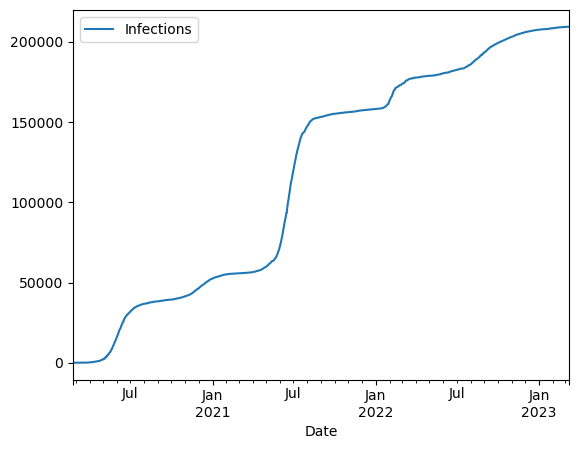

In [79]:
afghan.plot()

AttributeError: 'DatetimeIndex' object has no attribute 'dt'